In [4]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])

In [6]:
df_DA_India = df_DA_India.explode('job_skills')
df_DA_India[['job_skills', 'salary_year_avg']]

,job_skills,salary_year_avg
11412,python,50400.0
11412,sql,50400.0
11412,aws,50400.0
11412,azure,50400.0
11412,excel,50400.0
...,...,...
777313,looker,111202.0
777313,powerpoint,111202.0
784033,power bi,111175.0
784033,tableau,111175.0


In [7]:
df_DA_India_group = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay = df_DA_India_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_India_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

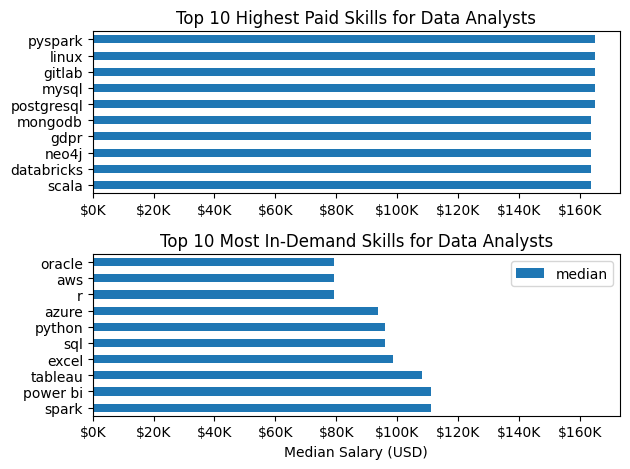

In [38]:
fig, ax = plt.subplots(2, 1)
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh',y='median', ax =ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()